In [32]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
# Configure Notebook

sns.set_context("notebook") 
import warnings 
warnings.filterwarnings('ignore')

In [68]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300 # increase resolution

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Reading Data



## Import Notebook 
First import notebook from previously exported raw data file

In [34]:
trips_data = pd.read_csv('trips_raw_data.csv')
trips_data

,Unnamed: 0,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,...,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,58,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
1,59,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
2,60,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St W / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
3,61,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
4,62,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St/Queens Quay(Billy Bishop Airport),7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039083,8039141,10293869,534405.0,497,7302.0,2020-10-31 23:57:00-05:00,Winona Dr / Davenport Rd - SMART,7144.0,2020-01-11 00:05:00-05:00,Palmerston Ave / Vermont Ave - SMART,...,8.9,3.7,70.0,20.0,22.0,16.1,100.70,NaN,NaN,NaN
8039084,8039142,10293870,630937.0,272,7129.0,2020-10-31 23:57:00-05:00,Davenport Rd / Avenue Rd,7130.0,2020-01-11 00:02:00-05:00,Davenport Rd / Bedford Rd,...,8.9,3.7,70.0,20.0,22.0,16.1,100.70,NaN,NaN,NaN
8039085,8039143,10293872,539030.0,646,7156.0,2020-10-31 23:58:00-05:00,Salem Ave / Bloor St W - SMART,7232.0,2020-01-11 00:09:00-05:00,Queen St W / Fuller Ave - SMART,...,8.9,3.7,70.0,20.0,22.0,16.1,100.70,NaN,NaN,NaN
8039086,8039144,10293874,863192.0,462,7026.0,2020-10-31 23:59:00-05:00,Bay St / St. Joseph St,7453.0,2020-01-11 00:06:00-05:00,Jarvis St / Maitland Pl,...,8.9,3.7,70.0,20.0,22.0,16.1,100.70,NaN,NaN,NaN


In [37]:
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039088 entries, 0 to 8039087
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   Trip Id              int64  
 2   Subscription Id      float64
 3   Trip Duration        int64  
 4   Start Station Id     float64
 5   Start Time           object 
 6   Start Station Name   object 
 7   End Station Id       float64
 8   End Time             object 
 9   End Station Name     object 
 10  Bike Id              float64
 11  User Type            object 
 12  merge_time           object 
 13  Date/Time            object 
 14  Temp (°C)            float64
 15  Dew Point Temp (°C)  float64
 16  Rel Hum (%)          float64
 17  Wind Dir (10s deg)   float64
 18  Wind Spd (km/h)      float64
 19  Visibility (km)      float64
 20  Stn Press (kPa)      float64
 21  Hmdx                 float64
 22  Wind Chill           float64
 23  Weather              object 
dty

## Setting Datetime
Converting Start Time and End Time to Datetime instead of object

In [43]:
trips_data['Start Time'] = pd.DatetimeIndex(trips_data['Start Time']).tz_convert(tz = 'EST')
trips_data['End Time'] = pd.DatetimeIndex(trips_data['End Time']).tz_convert(tz = 'EST')

In [44]:
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039088 entries, 0 to 8039087
Data columns (total 24 columns):
 #   Column               Dtype              
---  ------               -----              
 0   Unnamed: 0           int64              
 1   Trip Id              int64              
 2   Subscription Id      float64            
 3   Trip Duration        int64              
 4   Start Station Id     float64            
 5   Start Time           datetime64[ns, EST]
 6   Start Station Name   object             
 7   End Station Id       float64            
 8   End Time             datetime64[ns, EST]
 9   End Station Name     object             
 10  Bike Id              float64            
 11  User Type            object             
 12  merge_time           object             
 13  Date/Time            object             
 14  Temp (°C)            float64            
 15  Dew Point Temp (°C)  float64            
 16  Rel Hum (%)          float64            
 17  Wind Dir

In [45]:
trips_data.head()

,Unnamed: 0,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,...,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,58,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
1,59,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
2,60,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St W / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
3,61,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
4,62,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St/Queens Quay(Billy Bishop Airport),7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN


Since before 2018 user data is incomplete, we will exclude data before 2018 from Start Time 

In [86]:
trips_data = trips_data[trips_data['Start Time']>'2018-01-01']
trips_data.head()

,Unnamed: 0,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,...,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
1392031,1392089,2383648,NaN,393,7018.0,2018-01-01 00:47:00-05:00,Bremner Blvd / Rees St,7176.0,2018-01-01 00:54:00-05:00,Bathurst St / Fort York Blvd,...,-16.8,-21.1,70.0,NaN,4.0,16.1,102.1,NaN,-20.0,NaN
1392032,1392090,2383649,NaN,625,7184.0,2018-01-01 00:52:00-05:00,Ossington Ave / College St,7191.0,2018-01-01 01:03:00-05:00,Central Tech (Harbord St),...,-16.8,-21.1,70.0,NaN,4.0,16.1,102.1,NaN,-20.0,NaN
1392033,1392091,2383650,NaN,233,7235.0,2018-01-01 00:55:00-05:00,Bay St / College St (West Side) - SMART,7021.0,2018-01-01 00:59:00-05:00,Bay St / Albert St,...,-16.8,-21.1,70.0,NaN,4.0,16.1,102.1,NaN,-20.0,NaN
1392034,1392092,2383651,NaN,1138,7202.0,2018-01-01 00:57:00-05:00,Queen St W / York St (City Hall),7020.0,2018-01-01 01:16:00-05:00,Phoebe St / Spadina Ave,...,-16.8,-21.1,70.0,NaN,4.0,16.1,102.1,NaN,-20.0,NaN
1392035,1392093,2383652,NaN,703,7004.0,2018-01-01 01:00:00-05:00,University Ave / Elm St,7060.0,2018-01-01 01:12:00-05:00,Princess St / Adelaide St E,...,-16.8,-21.1,70.0,NaN,4.0,16.1,102.1,NaN,-20.0,NaN


# User Analysis 

## General Analysis without Weather factors 
In this section, casual and annual members are compared regardless of the weather conditions to provide a general overview and behaviour differences with a Frequency of Days

In [88]:
trips_data_day = trips_data
trips_data_day=trips_data_day.groupby([pd.Grouper(key='Start Time', freq='D')]).agg(
    rides=pd.NamedAgg(column='User Type', aggfunc=lambda x: (x.count())),
    annual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Annual Member'].count())),
    casual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Casual Member'].count())))

trips_data_day['rides'] = trips_data_day['rides'].astype('Int64')
trips_data_day['annual_members'] = trips_data_day['annual_members'].astype('Int64')
trips_data_day['casual_members'] = trips_data_day['casual_members'].astype('Int64')
trips_data_day.head()

,rides,annual_members,casual_members
Start Time,,,
2018-01-01 00:00:00-05:00,243,235,8
2018-01-02 00:00:00-05:00,953,934,19
2018-01-03 00:00:00-05:00,1181,1166,15
2018-01-04 00:00:00-05:00,1169,1153,16
2018-01-05 00:00:00-05:00,783,773,10


Adding workday indicator

In [89]:
trips_data_day['workday'] = np.where((trips_data_day.index.dayofweek) < 5,'True','False')
trips_data_day = trips_data_day.dropna()
trips_data_day.head()

,rides,annual_members,casual_members,workday
Start Time,,,,
2018-01-01 00:00:00-05:00,243,235,8,True
2018-01-02 00:00:00-05:00,953,934,19,True
2018-01-03 00:00:00-05:00,1181,1166,15,True
2018-01-04 00:00:00-05:00,1169,1153,16,True
2018-01-05 00:00:00-05:00,783,773,10,True


## Plotting Graph to compare workday vs non workday behaviour 

First, scatter plot is used 

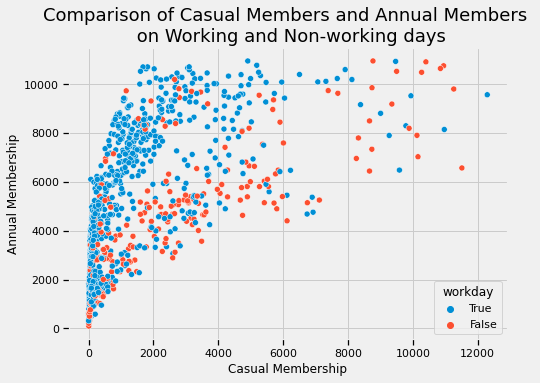

In [90]:
plt.figure(figsize=(7, 5))
plt.title('Comparison of Casual Members and Annual Members \n on Working and Non-working days', fontsize=18)
ax=sns.scatterplot(data=trips_data_day, x="casual_members", y="annual_members",hue="workday", )
handles, labels = ax.get_legend_handles_labels()
ax.legend( title='workday')
ax.set_xlabel('Casual Membership',fontsize=12)
ax.set_ylabel('Annual Membership',fontsize=12)
plt.show()

Combining with hue semantic to show distribution

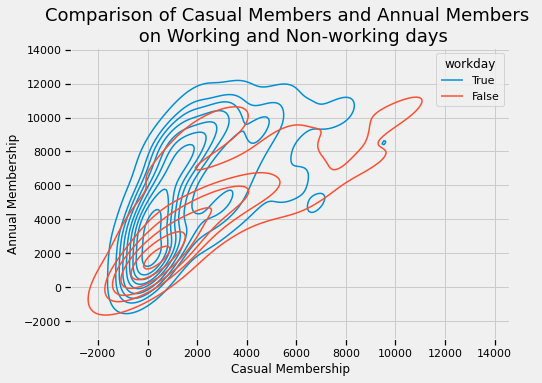

In [91]:
import matplotlib.patches as  mpatches
plt.figure(figsize=(7, 5))
trips_data_day['casual_members']=trips_data_day['casual_members'].astype('float64')
trips_data_day['annual_members']=trips_data_day['annual_members'].astype('float64')
plt.title('Comparison of Casual Members and Annual Members \n on Working and Non-working days', fontsize=18)
bx=sns.kdeplot(data=trips_data_day, x="casual_members", y="annual_members", hue="workday")
bx.set_xlabel('Casual Membership',fontsize=12)
bx.set_ylabel('Annual Membership',fontsize=12)
plt.show()

Adding a distriubtion plot as compliment

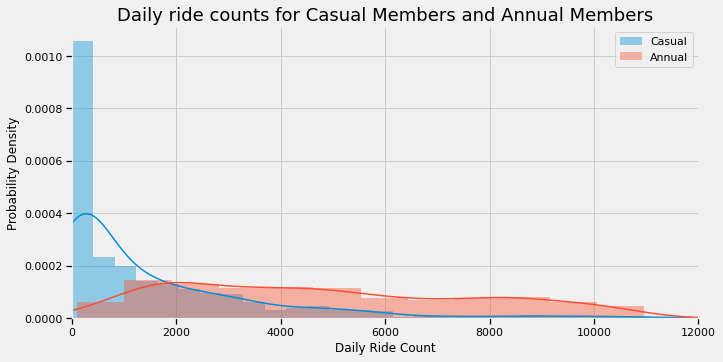

In [104]:
plt.figure(figsize=(10, 5))
plt.title('Daily ride counts for Casual Members and Annual Members', fontsize=18)
cx1=sns.distplot(trips_data_day[['casual_members']], label='Casual')
cx2=sns.distplot(trips_data_day[['annual_members']], label= 'Annual')
cx1.set_xlabel('Daily Ride Count',fontsize=12)
cx1.set_ylabel('Probability Density',fontsize=12)
cx1.set_xlim(0,12000)
plt.legend()
plt.show()

From the three graphs above, it is evident that there are more annual membership users utilizing the bike share service on weekdays, suggesting that these users are using the service for possible commuting to and from work. 
On the contrary, for casual members, the patterns are more spread out with a higher usage during the weekends, suggesting that casual users are utilizing the service for possible leisure purposes without specific pattern. However, in order to further justify the assumption that annual users are utilizing for commuting purposes, hours of use are examined below. 

## Hourly Breakdown 

To further examine the purposes of each member type, the start time is grouped together at hourly interval

In [112]:
trips_data_hour = trips_data
trips_data_hour=trips_data_hour.groupby([pd.Grouper(key='Start Time', freq='h')]).agg(
    rides=pd.NamedAgg(column='User Type', aggfunc=lambda x: (x.count())),
    annual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Annual Member'].count())),
    casual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Casual Member'].count())))

trips_data_hour['rides'] = trips_data_hour['rides'].astype('Int64')
trips_data_hour['annual_members'] = trips_data_hour['annual_members'].astype('Int64')
trips_data_hour['casual_members'] = trips_data_hour['casual_members'].astype('Int64')
trips_data_hour.head()

,rides,annual_members,casual_members
Start Time,,,
2018-01-01 00:00:00-05:00,4,4,0
2018-01-01 01:00:00-05:00,10,10,0
2018-01-01 02:00:00-05:00,6,5,1
2018-01-01 03:00:00-05:00,14,13,1
2018-01-01 04:00:00-05:00,6,6,0


Since for this comparison date does not matter, each hour will be grouped together and taking the average of the trips taken by each user type

In [113]:
trips_data_hour['datetime']=trips_data_hour.index
trips_data_hour['time']=trips_data_hour['datetime'].dt.hour
trips_data_hour = trips_data_hour.drop(columns=['datetime']).reset_index()
trips_data_hour = trips_data_hour.groupby(by='time').mean()
trips_data_hour.head()

,rides,annual_members,casual_members
time,,,
0,70.648936,47.155706,23.493230
1,43.708738,28.500000,15.208738
2,29.705594,19.308145,10.397448
3,15.173913,9.894843,5.279070
4,11.837972,8.857853,2.980119


Now plotting a distribution graph to show time of day and usage comparison

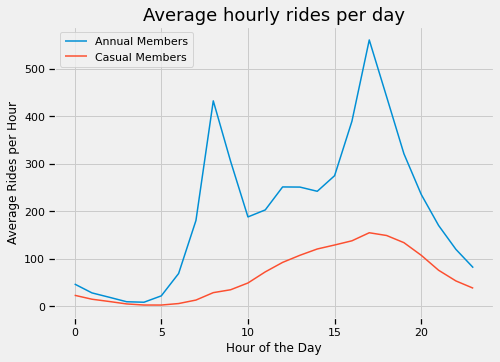

In [105]:
plt.figure(figsize=(7, 5))
plt.title('Average hourly rides per day', fontsize=18)
dx1=sns.lineplot(data=trips_data_hour, x='time', y="annual_members",label='Annual Members')
dx2=sns.lineplot(data=trips_data_hour, x='time', y="casual_members",label='Casual Members')
dx1.set_xlabel('Hour of the Day',fontsize=12)
dx1.set_ylabel('Average Rides per Hour',fontsize=12)
plt.show()

This graph clearly indicated 2 peak time for annual m embers at Hour 8 and Hour 17, aligning with rush hour times and matches with the expectation that most annual members are utilziing bike share service for the purpose of commuting to and from work.  

On the contrary, there is a lack of a significant peak hour for casual members aside from the gradual increase between Hour 12 and Hour 19 which suggests a more evenly spread out use such as for leisure or a specific purpose that is not time dependant. 

## General Analysis with Weather factors 
To further examine ridership type behaviours, weather factors are included

## Weather data 
First checking whether there are any null values in the Weather column 

In [106]:
trips_data.isnull().sum(axis=0).to_frame('count')

,count
Unnamed: 0,0
Trip Id,0
Subscription Id,1840078
Trip Duration,0
Start Station Id,0
Start Time,0
Start Station Name,0
End Station Id,0
End Time,0
End Station Name,0


In [107]:
trips_data.groupby('Weather')['Trip Id'].count().sort_values(ascending=False)

Weather
Rain                               204564
Fog                                134632
Snow                               107377
Rain,Fog                            56396
Haze                                31472
Thunderstorms,Rain                   7768
Moderate Rain                        7247
Moderate Rain,Fog                    5962
Thunderstorms,Heavy Rain,Fog         4110
Thunderstorms                        4095
Thunderstorms,Moderate Rain          3399
Rain,Snow                            2503
Heavy Rain,Fog                       1752
Thunderstorms,Fog                    1403
Freezing Rain,Fog                    1064
Moderate Snow                         398
Thunderstorms,Heavy Rain              324
Freezing Rain,Snow                    251
Heavy Snow                            203
Freezing Rain                         196
Snow,Blowing Snow                     109
Thunderstorms,Moderate Rain,Fog        88
Haze,Blowing Snow                      82
Thunderstorms,Rain,Fog    

From above since there are no clear indication, the assumption is that for the null values in weather those will be clear

The dataset will be grouped into hourly breakdown with ridership type, max temperature and weather condition 

In [145]:
trips_data_w= trips_data
trips_data_w['Weather'].fillna('clearday', inplace=True)

trips_data_w=trips_data_w.groupby([pd.Grouper(key='Start Time', freq='D')]).agg(
    rides=pd.NamedAgg(column='User Type', aggfunc=lambda x: (x.count())),
    annual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Annual Member'].count())),
    casual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: (x[x=='Casual Member'].count())),
    temp = pd.NamedAgg(column='Temp (°C)', aggfunc=lambda x: (x.max())),
    weather_count= pd.NamedAgg(column='Weather', aggfunc=lambda x: (x.count())),
    weather_rain_count = pd.NamedAgg(column='Weather', aggfunc=lambda x: (x[x=='clearday'].count()))
)
trips_data_w['rides'] = trips_data_w['rides'].astype('Int64')
trips_data_w['annual_members'] = trips_data_w['annual_members'].astype('Int64')
trips_data_w['casual_members'] = trips_data_w['casual_members'].astype('Int64')
trips_data_w['workday'] = np.where((trips_data_w.index.dayofweek) < 5,'True','False')
trips_data_w['weather_per']= trips_data_w[['weather_rain_count']].div(trips_data_w.weather_count,axis=0)
trips_data_w['weather_per']=trips_data_w['weather_per']*100
trips_data_w['weather']= np.where(trips_data_w['weather_per']>= 50.0 , 'Clear', 'Precipitation')
trips_data_w = trips_data_w[['rides','annual_members','casual_members','workday','temp','weather']]

# View DataFrame
trips_data_w.head(10)

,rides,annual_members,casual_members,workday,temp,weather
Start Time,,,,,,
2018-01-01 00:00:00-05:00,243,235,8,True,-8.0,Clear
2018-01-02 00:00:00-05:00,953,934,19,True,-6.6,Clear
2018-01-03 00:00:00-05:00,1181,1166,15,True,-5.0,Precipitation
2018-01-04 00:00:00-05:00,1169,1153,16,True,-7.6,Clear
2018-01-05 00:00:00-05:00,783,773,10,True,-15.2,Clear
2018-01-06 00:00:00-05:00,398,390,8,False,-15.4,Clear
2018-01-07 00:00:00-05:00,524,514,10,False,-1.2,Clear
2018-01-08 00:00:00-05:00,1013,998,15,True,2.7,Clear
2018-01-09 00:00:00-05:00,1890,1841,49,True,1.6,Clear


## Plotting Visual Representation

First a vioin graph is plotted 

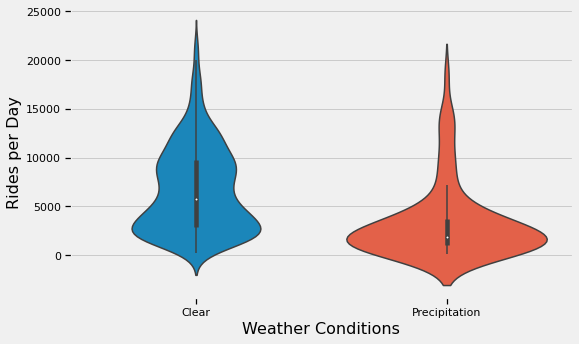

In [147]:
plt.figure(figsize=(8, 5))
trips_data_w =trips_data_w[(trips_data_w[['rides']] != 0).all(axis=1)]
trips_data_w['rides']=trips_data_w['rides'].astype('float64')
ex = sns.violinplot(x="weather", y="rides", data=trips_data_w)
ex.set_xlabel('Weather Conditions',fontsize=16)
ex.set_ylabel('Rides per Day',fontsize=16)
plt.show()

Followed up scatter plot

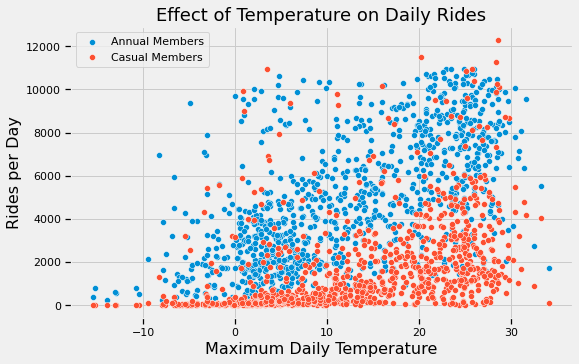

In [149]:
plt.figure(figsize=(8, 5))
plt.title('Effect of Temperature on Daily Rides', fontsize=18)
fx1= sns.scatterplot(data=trips_data_w, x="temp", y="annual_members",label='Annual Members')
fx2= sns.scatterplot(data=trips_data_w, x="temp", y="casual_members",label='Casual Members')
fx1.set_xlabel('Maximum Daily Temperature',fontsize=16)
fx1.set_ylabel('Rides per Day',fontsize=16)
plt.show()

From the above graphs, it shows that there is a direct relationship between weather conditions and ridership, where when weather is clear without precipitation, there is a higher probability of ridership as well as a higher mean. 

Additonally higher the temperature will also result in an increase ridership per day. However, the impact is greater for casual members than annual members where the increae of ridership by temperature is more heavily influenced by temperature for casual members than annual members. 